In [1]:
import matplotlib.pyplot as plt
import datetime
from sshtunnel import SSHTunnelForwarder
import psycopg2

In [2]:
# Secure tunnel variables
host = 'ec2-3-17-203-3.us-east-2.compute.amazonaws.com'
ssh_username = 'ubuntu'
ss_private_key = 'awskey.pem'

In [3]:
# Database variables
POSTGRES_USER='drum_running'
password='king_crimson'
database='MA_DOT'

In [4]:
# Initiate ssh session with drum_running(AWS)
tunnel = SSHTunnelForwarder(
    (host, 22),
    ssh_username=ssh_username,
    ssh_private_key=ss_private_key,
    remote_bind_address=('localhost', 5432),
    local_bind_address=('localhost', 1111),
)

In [5]:
# Function that will execute the SQL command to the server
def pg_data(start_hour, end_hour, table):
    tunnel.start()
    
    conn = psycopg2.connect(
        database=database,
        user=POSTGRES_USER,
        password=password,
        host=tunnel.local_bind_host,
        port=tunnel.local_bind_port,
    )
    dt = datetime.datetime.today()
    
    cur = conn.cursor()
    
    cur.execute("SELECT eventtime, accel_1_x, accel_1_y, accel_1_z, accel_2_x, accel_2_y, accel_2_z, accel_3_x, accel_3_y, accel_3_z, accel_4_x, accel_4_y, accel_4_z, accel_5_x, accel_5_y, accel_5_z, accel_6_x, accel_6_y, accel_6_z FROM {6} WHERE received BETWEEN '2019-{0}-{1} {4}:00:00' AND '2019-{2}-{3} {5}:59:00' ORDER BY id".format(
        dt.month, 
        dt.day -2, 
        dt.month, 
        dt.day -1,
        start_hour,
        end_hour,
        table
    ))
    
    data = cur.fetchall()
    
    conn.close()
    
    tunnel.stop()
    
    return data


In [6]:
# Function that will format the data from PostgreSQL into an organized data structure
def parsed_inc_plot(result):
    accel1 = [[],[],[]]
    accel2 = [[],[],[]]
    accel3 = [[],[],[]]
    accel4 = [[],[],[]]
    accel5 = [[],[],[]]
    accel6 = [[],[],[]]
    received = []

    for i in range(len(result)):      
        accel1[0].append(result[i][7])
        accel1[1].append(result[i][8])
        accel1[2].append(result[i][9])
        
        accel2[0].append(result[i][10])
        accel2[1].append(result[i][11])
        accel2[2].append(result[i][12])
        
        accel3[0].append(result[i][13])
        accel3[1].append(result[i][14])
        accel3[2].append(result[i][15])
        
        accel4[0].append(result[i][16])
        accel4[1].append(result[i][17])
        accel4[2].append(result[i][18])
        
        accel5[0].append(result[i][19])
        accel5[1].append(result[i][20])
        accel5[2].append(result[i][21])
        
        accel6[0].append(result[i][22])
        accel6[1].append(result[i][23])
        accel6[2].append(result[i][24])
        
        received.append(result[i][0])
        
    return { 
        "accel1": accel1,
        "accel2": accel2,
        "accel3": accel3,
        "accel4": accel4,
        "accel5": accel5,
        "accel6": accel6,
        "received": received 
    }



In [7]:
# Get data from server, parse, format and instantiate linear chart library configuration
plt.rcParams["figure.figsize"] = (50, 10)
result = pg_data("18", "17", "uxbridge_chocolog_st")
parsed_inc_data = parsed_inc_plot(result)
inc = plt
accel = plt

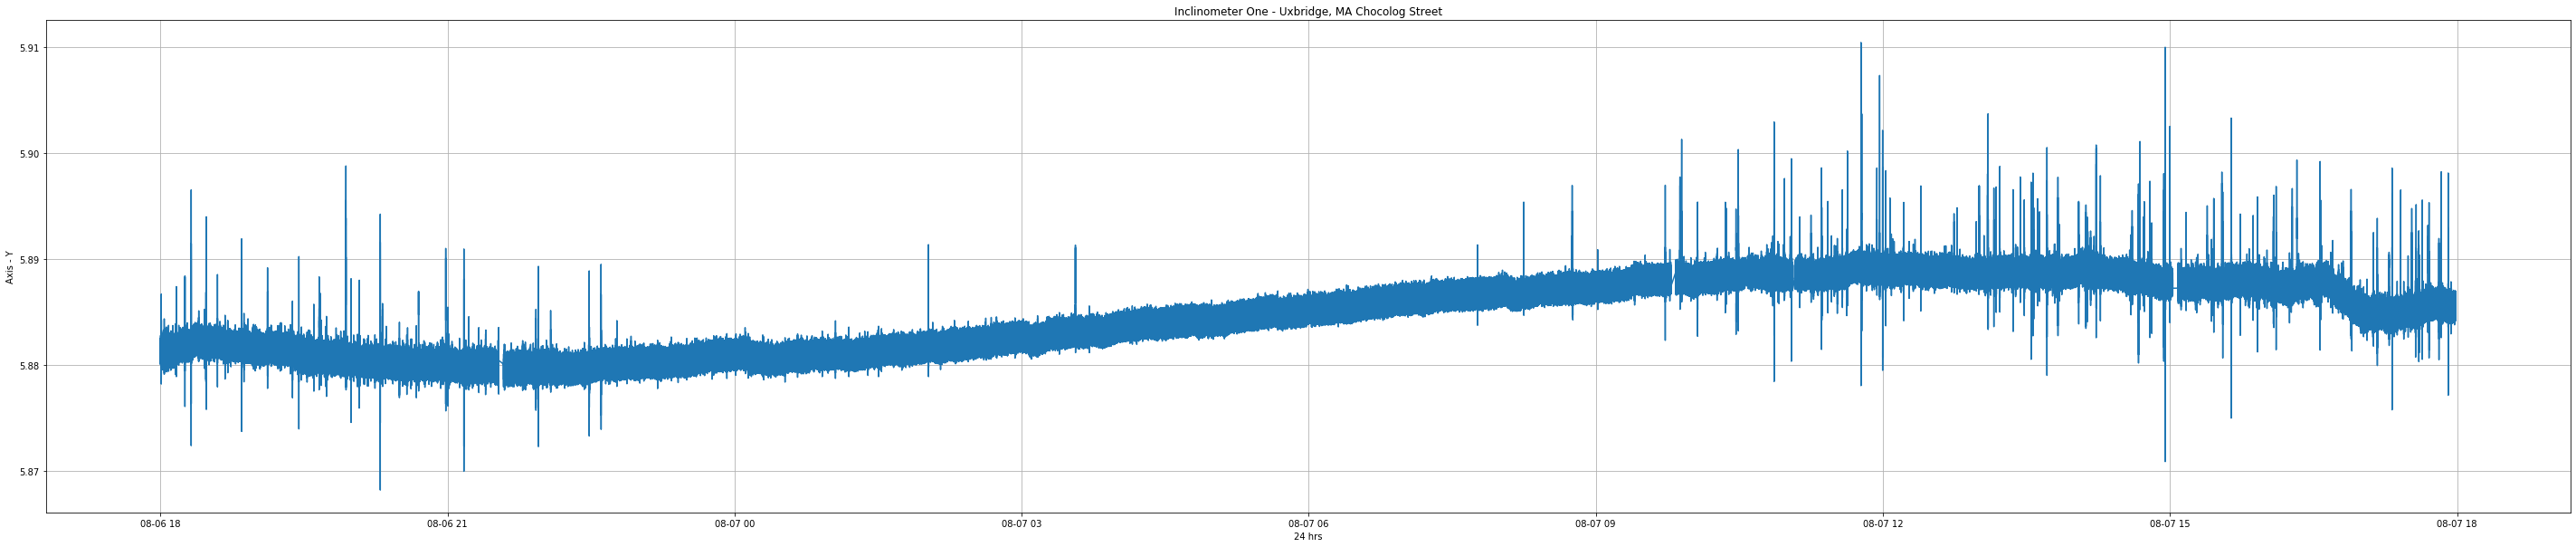

In [8]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc1'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer One - Uxbridge, MA Chocolog Street")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


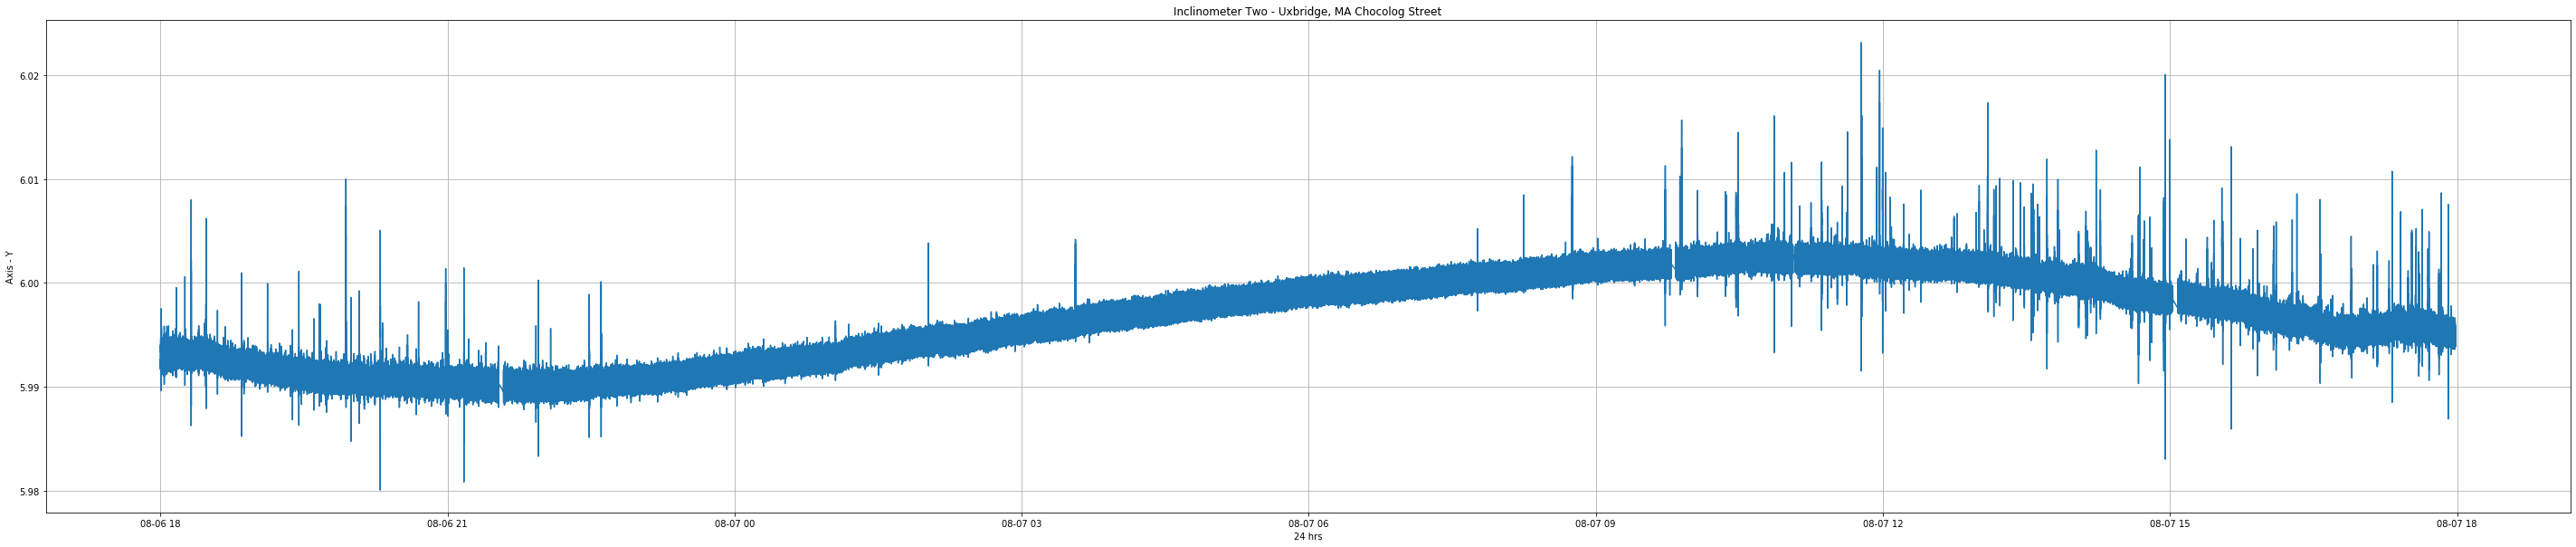

In [9]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc2'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Two - Uxbridge, MA Chocolog Street")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


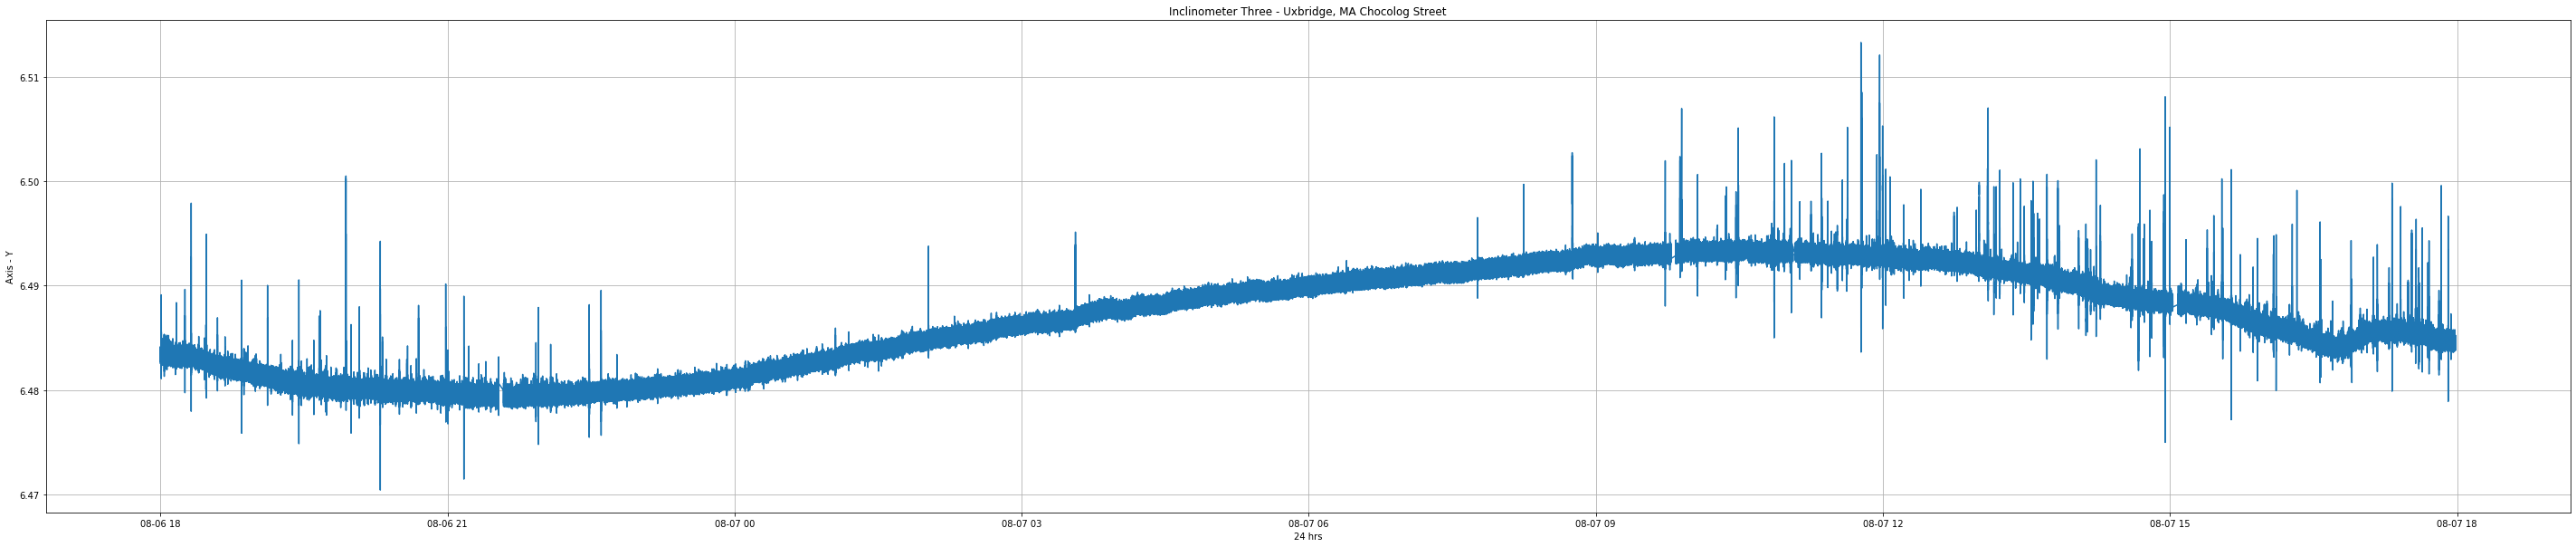

In [10]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc3'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Three - Uxbridge, MA Chocolog Street")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


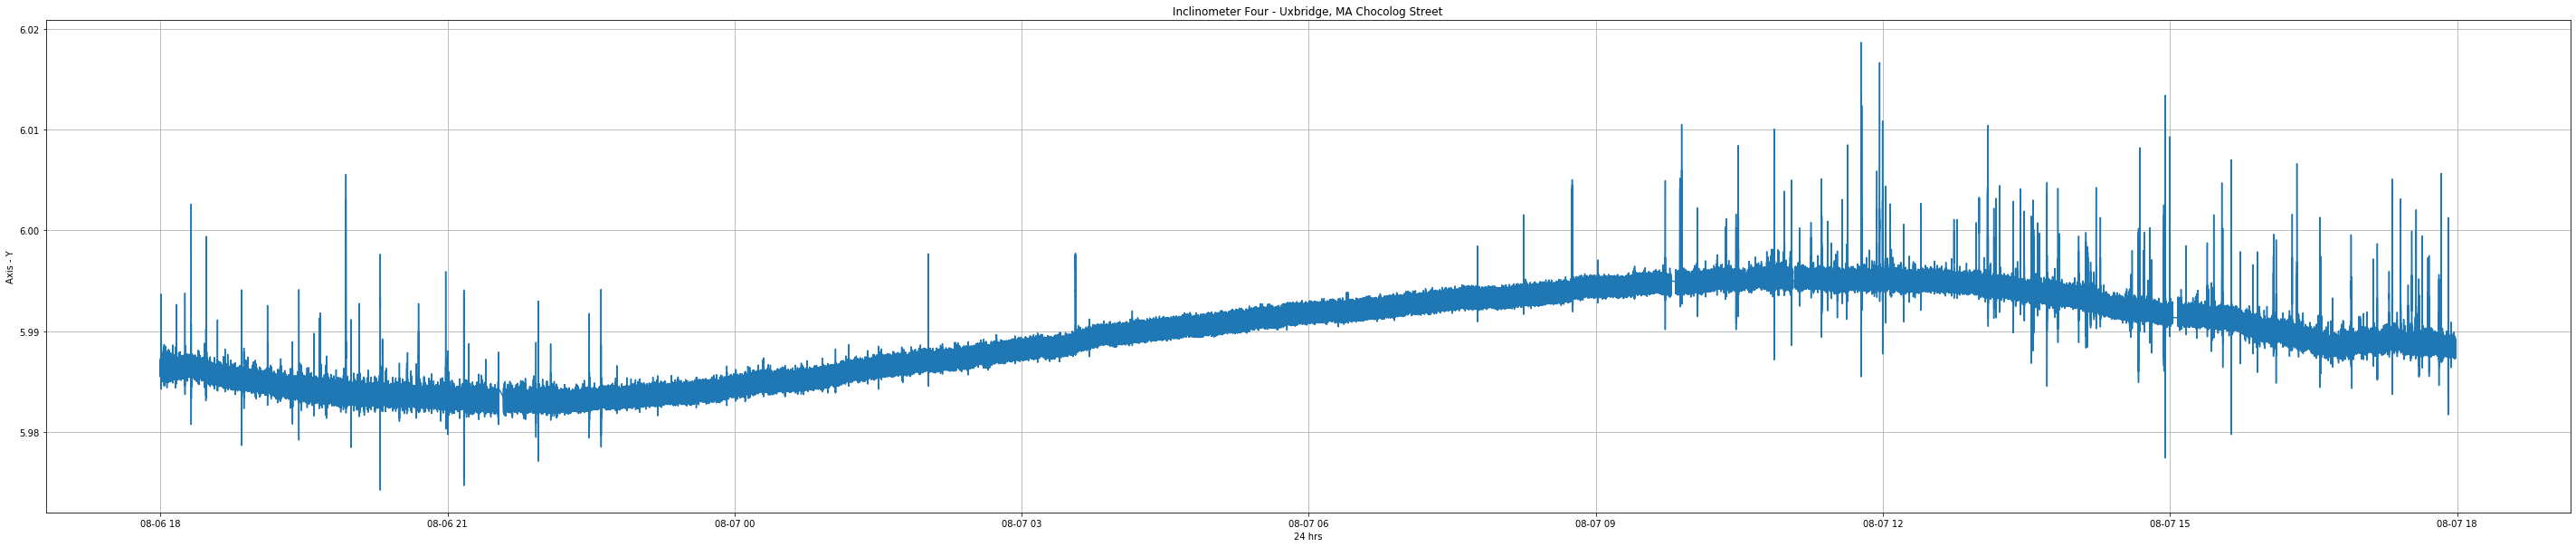

In [11]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc4'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Four - Uxbridge, MA Chocolog Street")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


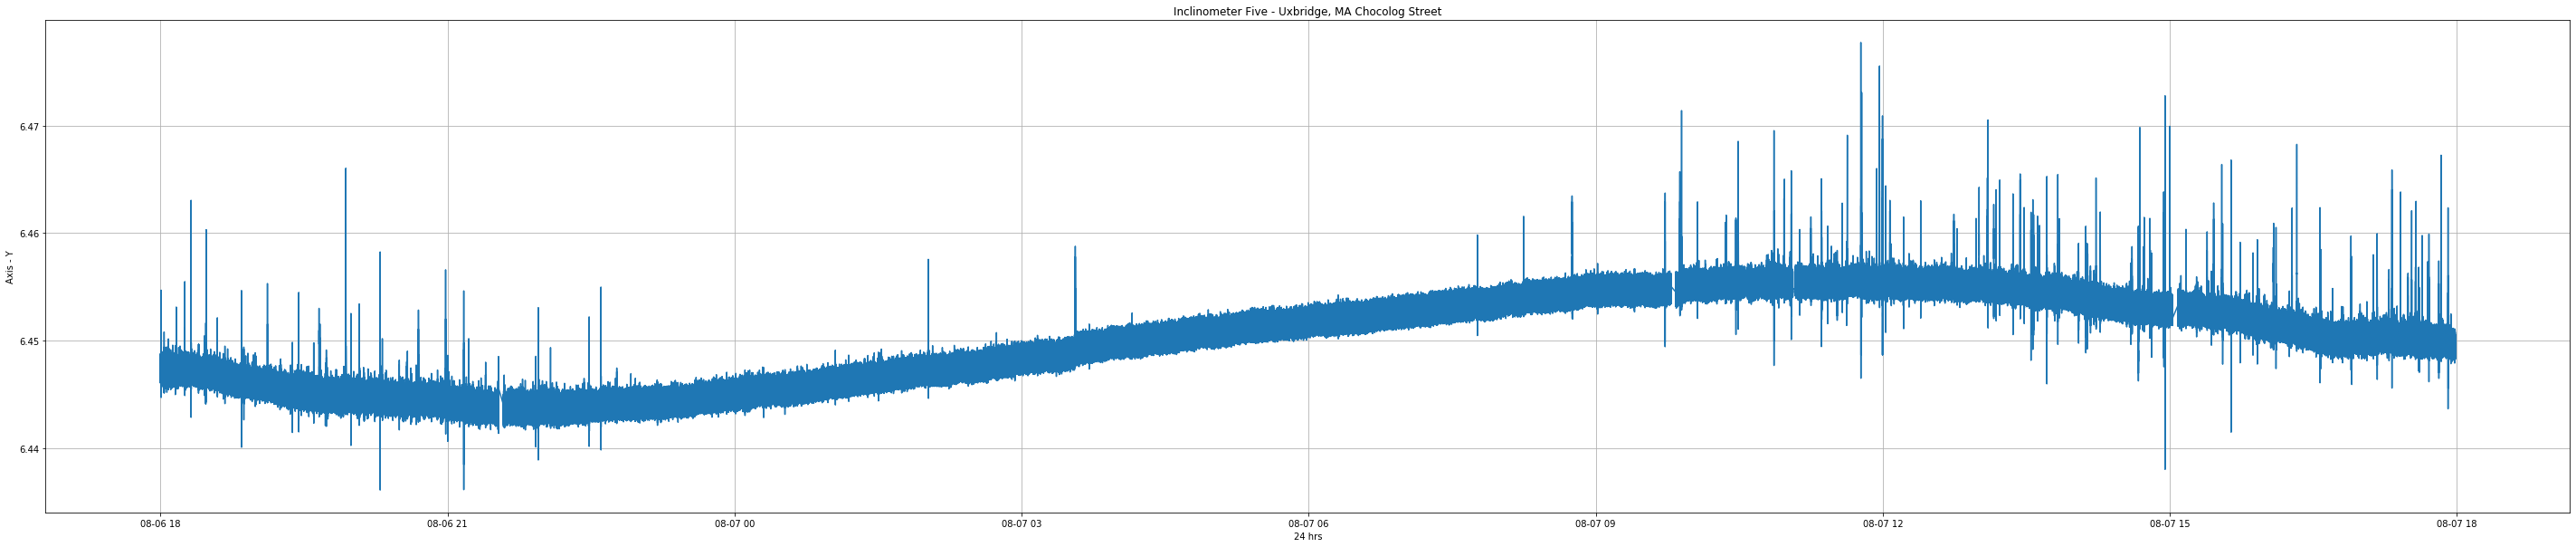

In [12]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc5'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Five - Uxbridge, MA Chocolog Street")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


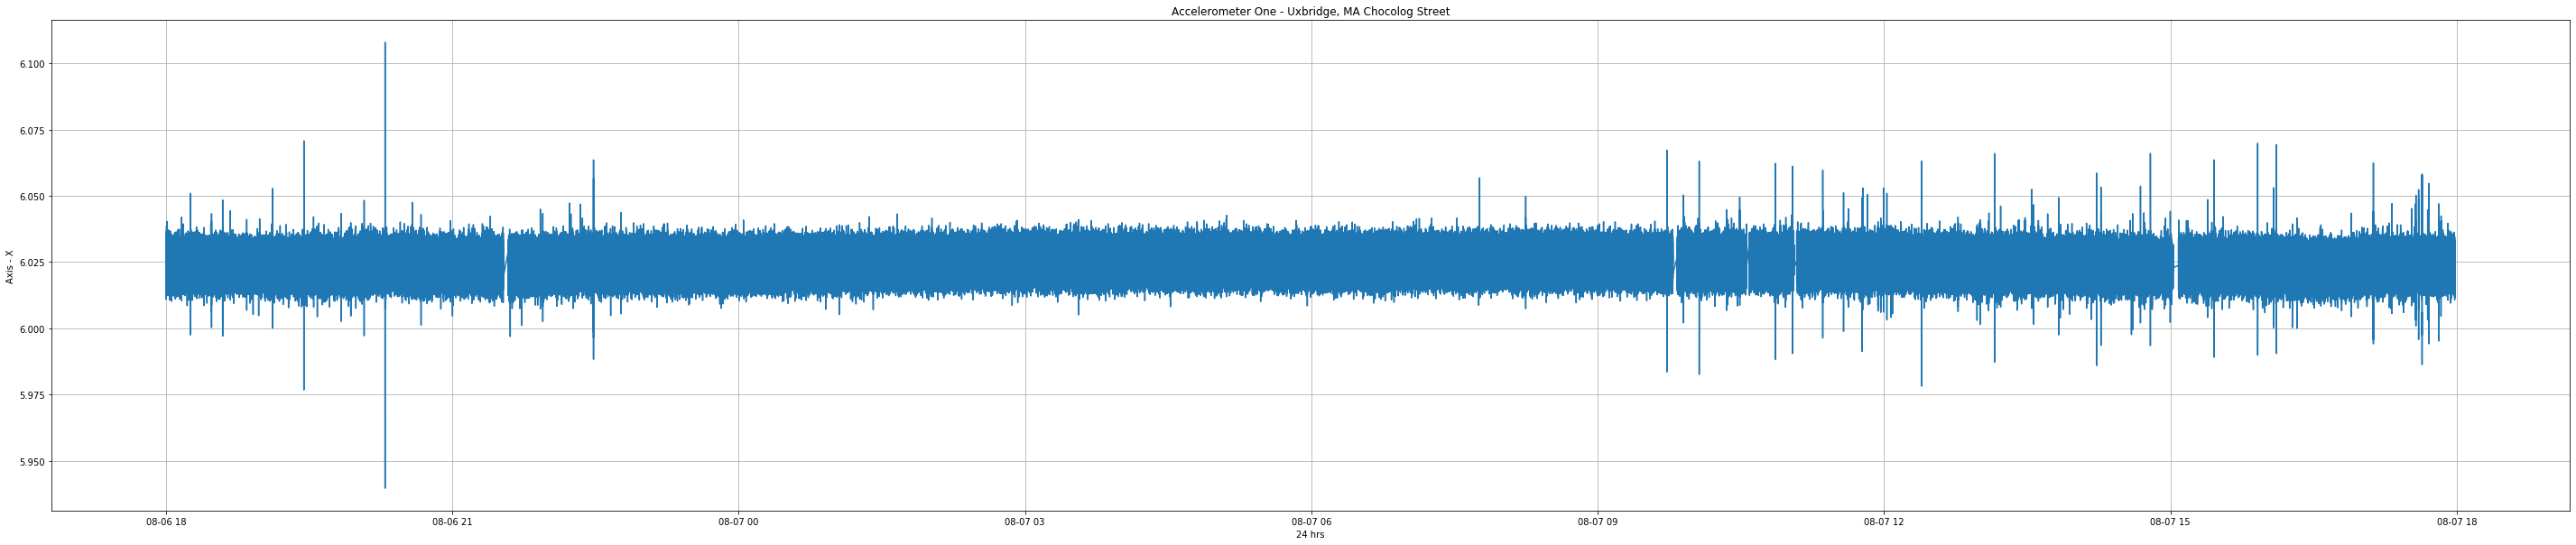

In [13]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel1'][0])
accel.ylabel('Axis - X')
accel.title("Accelerometer One - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


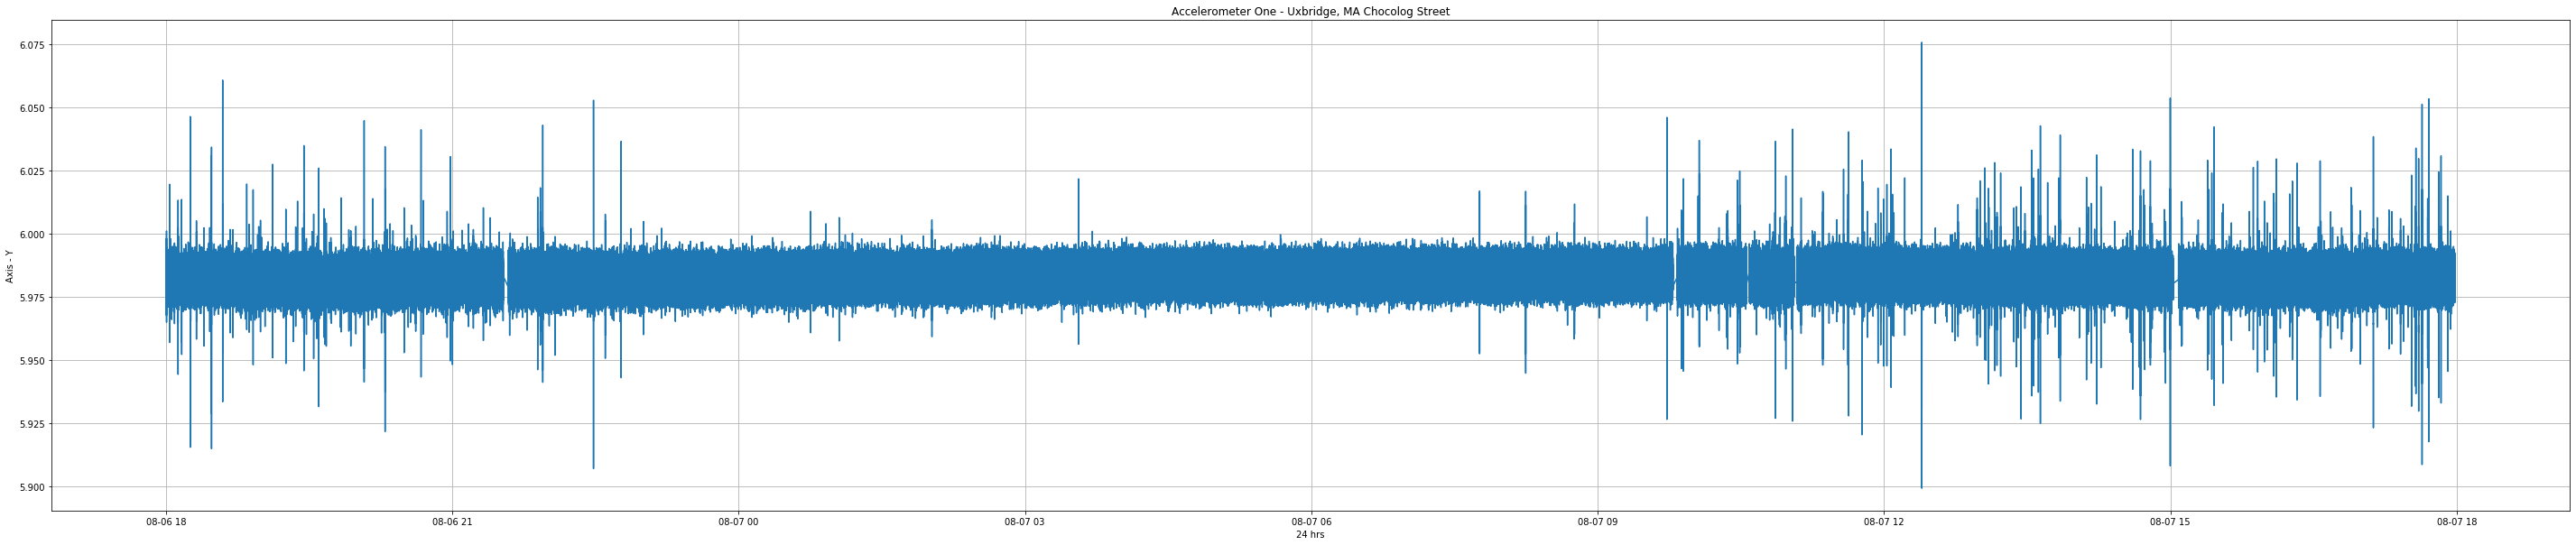

In [14]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel1'][1])
accel.ylabel('Axis - Y')
accel.title("Accelerometer One - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


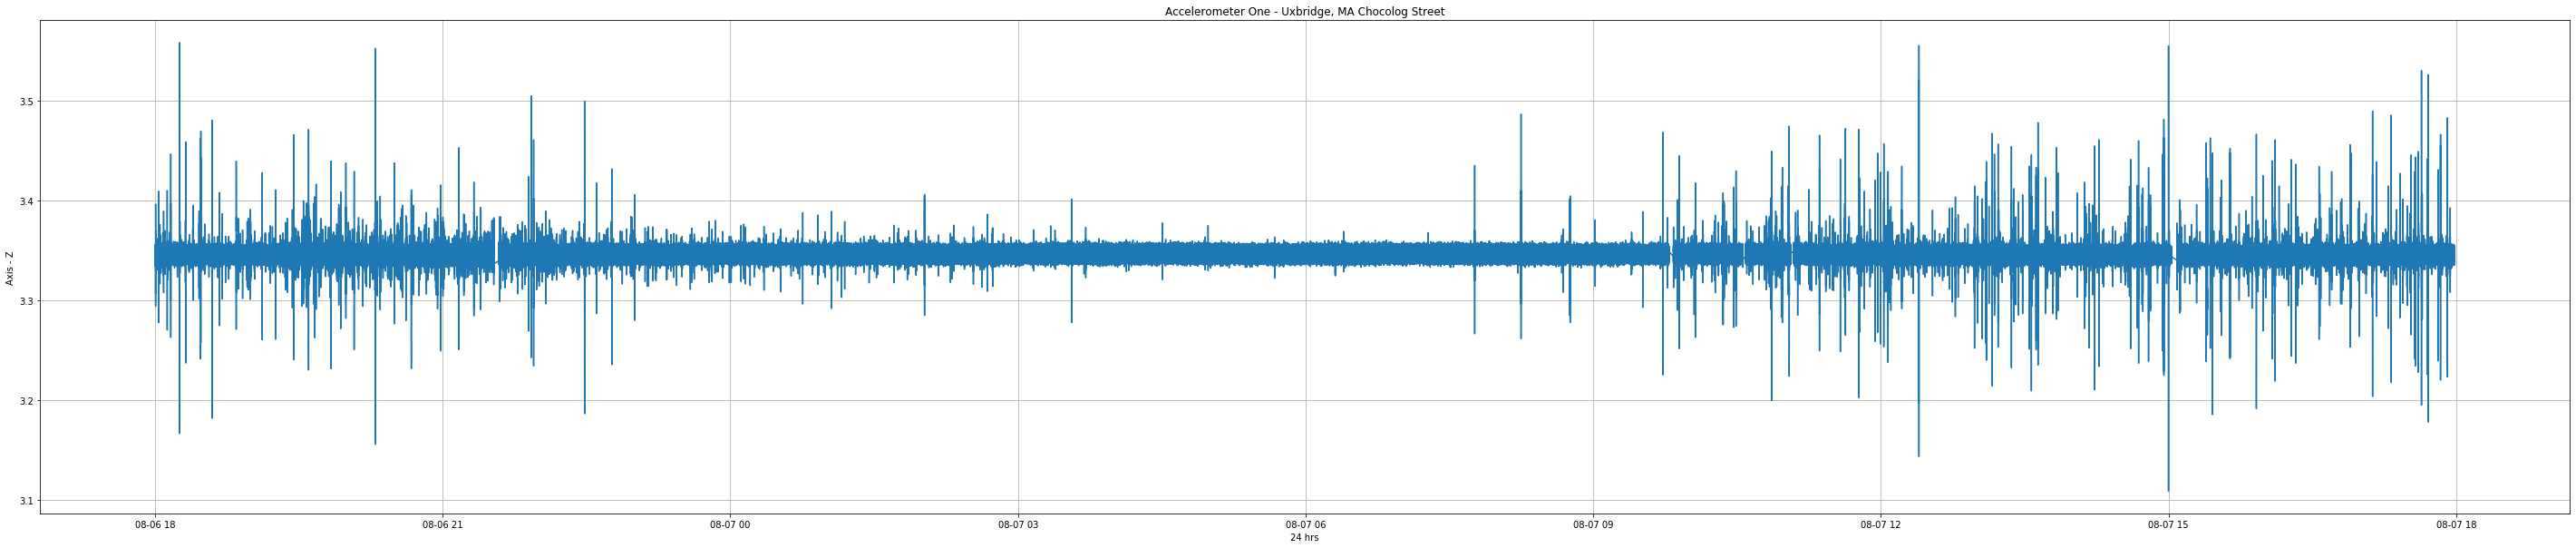

In [15]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel1'][2])
accel.ylabel('Axis - Z')
accel.title("Accelerometer One - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


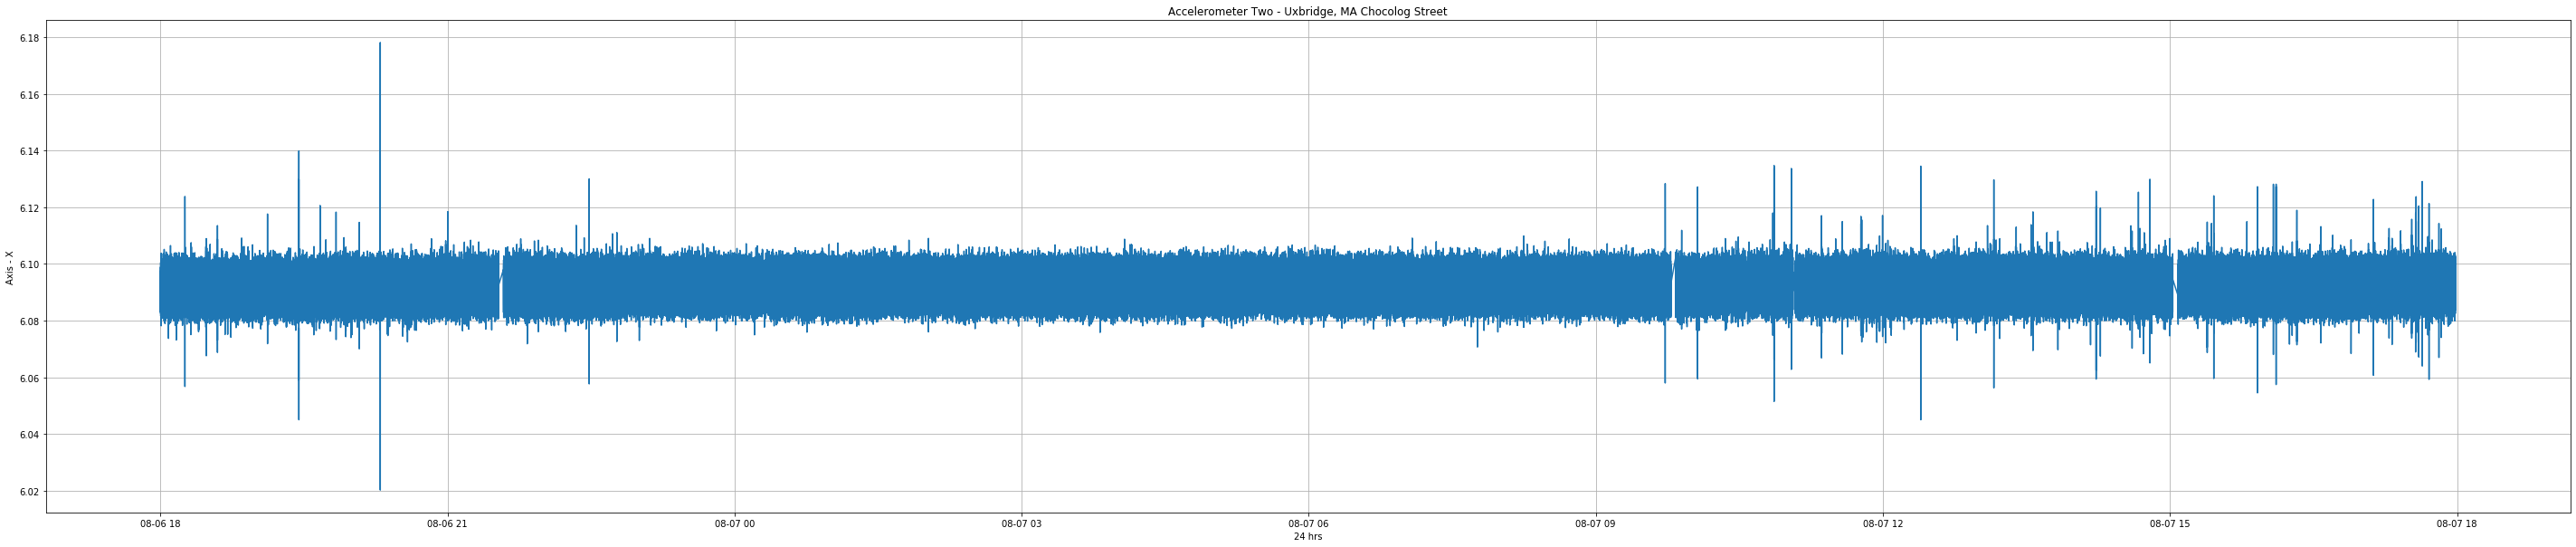

In [16]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel2'][0])
accel.ylabel('Axis - X')
accel.title("Accelerometer Two - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel2'][1])
accel.ylabel('Axis - Y')
accel.title("Accelerometer Two - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel2'][2])
accel.ylabel('Axis - Z')
accel.title("Accelerometer Two - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel3'][0])
accel.ylabel('Axis - X')
accel.title("Accelerometer Three - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel3'][1])
accel.ylabel('Axis - Y')
accel.title("Accelerometer Three - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel3'][2])
accel.ylabel('Axis - Z')
accel.title("Accelerometer Three - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel4'][0])
accel.ylabel('Axis - X')
accel.title("Accelerometer Four - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel4'][1])
accel.ylabel('Axis - Y')
accel.title("Accelerometer Four - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel4'][2])
accel.ylabel('Axis - Z')
accel.title("Accelerometer Four - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel5'][0])
accel.ylabel('Axis - X')
accel.title("Accelerometer Five - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel5'][1])
accel.ylabel('Axis - Y')
accel.title("Accelerometer Five - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel5'][2])
accel.ylabel('Axis - Z')
accel.title("Accelerometer Five - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel6'][0])
accel.ylabel('Axis - X')
accel.title("Accelerometer Six - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel6'][1])
accel.ylabel('Axis - Y')
accel.title("Accelerometer Six - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()


In [ ]:
accel.plot(parsed_inc_data['received'], parsed_inc_data['accel6'][2])
accel.ylabel('Axis - Z')
accel.title("Accelerometer Six - Uxbridge, MA Chocolog Street")
accel.xlabel('24 hrs')
accel.grid(True)

accel.show()
